In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(0, "../libs/")

In [3]:
import pandas as pd
import json
from datetime import datetime
from plots import make_boxplot_single

In [4]:
df_data = pd.read_csv("../raw_data/stress_demo/academic Stress level - maintainance 1.csv")
df_data.drop(columns=["Timestamp"], inplace=True)
df_data.head(5)

,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [5]:
df_data.shape

(140, 8)

In [6]:
df_data["Rate your academic stress index "].value_counts()

Rate your academic stress index 
4    56
3    36
5    33
2     9
1     6
Name: count, dtype: int64

In [7]:
df_data["Do you have any bad habits like smoking, drinking on a daily basis?"].value_counts()

Do you have any bad habits like smoking, drinking on a daily basis?
No                   123
Yes                   10
prefer not to say      7
Name: count, dtype: int64

In [8]:
df_data.columns

Index(['Your Academic Stage', 'Peer pressure',
       'Academic pressure from your home', 'Study Environment',
       'What coping strategy you use as a student?',
       'Do you have any bad habits like smoking, drinking on a daily basis?',
       'What would you rate the academic  competition in your student life',
       'Rate your academic stress index '],
      dtype='object')

In [9]:
name_columns = {
    "academic_stage": 'Your Academic Stage', 
    "peer_pressure": 'Peer pressure',
    "academic_pressure" : 'Academic pressure from your home', 
    "study_environment" : 'Study Environment',
    "coping_strategy" : 'What coping strategy you use as a student?',
    "bad_habits" : 'Do you have any bad habits like smoking, drinking on a daily basis?',
    "rate_academic_competition" : 'What would you rate the academic  competition in your student life',
    "academic_stress" : 'Rate your academic stress index '
}

In [10]:
df_data.shape[1]

8

In [ ]:
data_info_dataset = {
    "name_columns" : name_columns,
    "examples" : df_data.shape[0],
    "features" : df_data.shape[1] -1,
    "task" : "classification",
    "data_creation" : datetime.today().strftime('%Y-%m-%d %H:%M:%S'),
    "completed_data" : {
        "columns" : {
            "method": "asdfas",
            "comment": "dasdasd"
        }
    }
}

In [12]:
with open("../results/stress/metadata.json", 'w') as doc_export:
    json.dump(data_info_dataset, doc_export, indent=4)

In [13]:
list_keys = []
for value in name_columns.keys():
    list_keys.append(value)

In [14]:
df_data.columns = list_keys

In [15]:
df_data.head(5)

,academic_stage,peer_pressure,academic_pressure,study_environment,coping_strategy,bad_habits,rate_academic_competition,academic_stress
0,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [16]:
colors = {1:"#264653", 
          2: "#2a9d8f",
          3: "#e9c46a",
          4: "#f4a261",
          5: "#e76f51"}

In [17]:
df_data.columns

Index(['academic_stage', 'peer_pressure', 'academic_pressure',
       'study_environment', 'coping_strategy', 'bad_habits',
       'rate_academic_competition', 'academic_stress'],
      dtype='object')

In [18]:
df_data["rate_academic_competition"].describe()

count    140.000000
mean       3.492857
std        1.028349
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: rate_academic_competition, dtype: float64

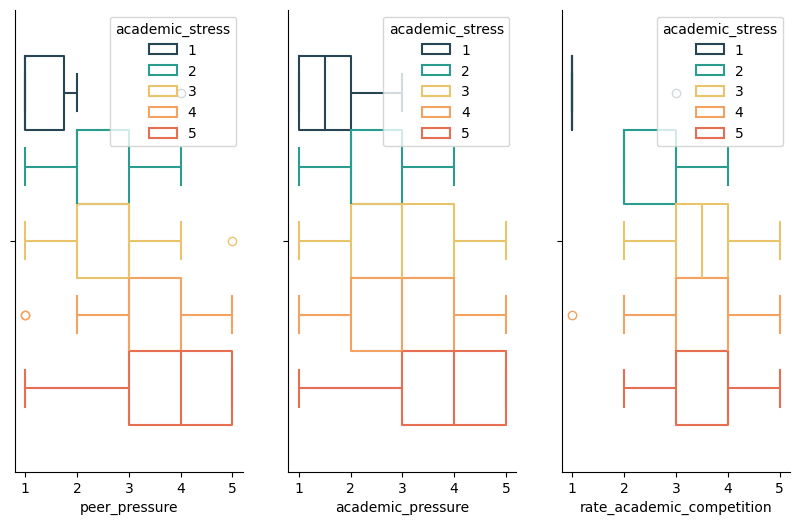

In [19]:
make_boxplot_single(
    df_data, 
    colors, 
    cols=3,
    columns=['peer_pressure', 'academic_pressure', 'rate_academic_competition'],
    hue="academic_stress",
    export=False
)

In [20]:
df_data.describe()

,peer_pressure,academic_pressure,rate_academic_competition,academic_stress
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [23]:
df_data["academic_stress"].value_counts()

academic_stress
4    56
3    36
5    33
2     9
1     6
Name: count, dtype: int64

In [22]:
df_data["academic_stage"].value_counts()

academic_stage
undergraduate    100
high school       29
post-graduate     11
Name: count, dtype: int64

In [21]:
df_data["academic_pressure"].value_counts()

academic_pressure
3    44
5    28
4    27
2    24
1    17
Name: count, dtype: int64

In [25]:
df_data.groupby(by=["academic_stress", "academic_pressure"]).count()

academic_stage  peer_pressure  \
academic_stress academic_pressure                                  
1               1                               3              3   
                2                               2              2   
                3                               1              1   
2               1                               2              2   
                2                               4              4   
                3                               2              2   
                4                               1              1   
3               1                               4              4   
                2                               7              7   
                3                              14             14   
                4                               7              7   
                5                               4              4   
4               1                               5              5   
                2                              10             10   
                3                              19             19   
                4                              14             14   
                5                               8              8   
5               1                               3              3   
                2                               1              1   
                3                               8              8   
                4                               5              5   
                5                              16             16   

                                   study_environment  coping_strategy  \
academic_stress academic_pressure                                       
1               1                                  3                3   
                2                                  2                2   
                3                                  1                1   
2               1                                  2                2   
                2                                  4                4   
                3                                  2                2   
                4                                  1                1   
3               1                                  4                4   
                2                                  7                7   
                3                                 14               14   
                4                                  7                7   
                5                                  4                4   
4               1                                  5                5   
                2                                 10               10   
                3                                 19               19   
                4                                 14               14   
                5                                  7                8   
5               1                                  3                3   
                2                                  1                1   
                3                                  8                8   
                4                                  5                5   
                5                                 16               16   

                                   bad_habits  rate_academic_competition  
academic_stress academic_pressure                                         
1               1                           3                          3  
                2                           2                          2  
                3                           1                          1  
2               1                           2                          2  
                2                           4                          4  
                3                           2                          2  
                4                           1    

In [26]:
df_data.groupby(by=["academic_stress", "academic_pressure", "academic_stage"]).count()

peer_pressure  \
academic_stress academic_pressure academic_stage                  
1               1                 high school                 1   
                                  undergraduate               2   
                2                 undergraduate               2   
                3                 high school                 1   
2               1                 undergraduate               2   
                2                 undergraduate               4   
                3                 undergraduate               2   
                4                 high school                 1   
3               1                 undergraduate               4   
                2                 high school                 1   
                                  undergraduate               6   
                3                 high school                 2   
                                  post-graduate               1   
                                  undergraduate              11   
                4                 high school                 3   
                                  post-graduate               1   
                                  undergraduate               3   
                5                 post-graduate               2   
                                  undergraduate               2   
4               1                 high school                 1   
                                  undergraduate               4   
                2                 high school                 1   
                                  post-graduate               2   
                                  undergraduate               7   
                3                 high school                 6   
                                  post-graduate               1   
                                  undergraduate              12   
                4                 high school                 2   
                                  post-graduate               3   
                                  undergraduate               9   
                5                 high school                 1   
                                  undergraduate               7   
5               1                 post-graduate               1   
                                  undergraduate               2   
                2                 undergraduate               1   
                3                 high school                 1   
                                  undergraduate               7   
                4                 high school                 2   
                                  undergraduate               3   
                5                 high school                 6   
                                  undergraduate              10   

                                                  study_environment  \
academic_stress academic_pressure academic_stage                      
1               1                 high school                     1   
                                  undergraduate                   2   
                2                 undergraduate                   2   
                3                 high school                     1   
2               1                 undergraduate                   2   
                2                 undergraduate                   4   
                3                 undergraduate                   2   
                4                 high school                     1   
3               1                 undergraduate                   4   
                2                 high school                     1   
                                  undergraduate                   6   
                3                 high school                     2   
                                  post-graduate                   1   
                                  undergraduate                  11   
                4               

In [28]:
for column in df_data.columns:
    print(df_data[column].value_counts())

academic_stage
undergraduate    100
high school       29
post-graduate     11
Name: count, dtype: int64
peer_pressure
3    57
4    32
2    24
5    14
1    13
Name: count, dtype: int64
academic_pressure
3    44
5    28
4    27
2    24
1    17
Name: count, dtype: int64
study_environment
Peaceful     69
disrupted    38
Noisy        32
Name: count, dtype: int64
coping_strategy
Analyze the situation and handle it with intellect    87
Emotional breakdown (crying a lot)                    32
Social support (friends, family)                      21
Name: count, dtype: int64
bad_habits
No                   123
Yes                   10
prefer not to say      7
Name: count, dtype: int64
rate_academic_competition
4    56
3    40
5    21
2    17
1     6
Name: count, dtype: int64
academic_stress
4    56
3    36
5    33
2     9
1     6
Name: count, dtype: int64


In [29]:
df_data.describe()

,peer_pressure,academic_pressure,rate_academic_competition,academic_stress
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [32]:
matrix_null_data = []

for column in df_data.columns:
    value_nulls = df_data[column].isna().value_counts()
    row = [column, 0, 0]
    if True in value_nulls.index:
        row[1] = value_nulls[True]
    if False in value_nulls.index:
        row[2] = value_nulls[False]
    
    matrix_null_data.append(row)

df_nulls = pd.DataFrame(data=matrix_null_data, columns=["column", "Nulos", "No-Nulos"])
df_nulls

,column,Nulos,No-Nulos
0,academic_stage,0,140
1,peer_pressure,0,140
2,academic_pressure,0,140
3,study_environment,1,139
4,coping_strategy,0,140
5,bad_habits,0,140
6,rate_academic_competition,0,140
7,academic_stress,0,140


In [34]:
df_data[df_data["study_environment"].isna()]

,academic_stage,peer_pressure,academic_pressure,study_environment,coping_strategy,bad_habits,rate_academic_competition,academic_stress
129,undergraduate,5,5,NaN,Emotional breakdown (crying a lot),No,5,4


In [37]:
df_data["study_environment"].value_counts()

study_environment
Peaceful     69
disrupted    38
Noisy        32
Name: count, dtype: int64

In [36]:
df_data[(df_data["academic_stage"] == "undergraduate") & 
        (df_data["peer_pressure"] == 5) &
        (df_data["academic_pressure"] == 5)]

,academic_stage,peer_pressure,academic_pressure,study_environment,coping_strategy,bad_habits,rate_academic_competition,academic_stress
6,undergraduate,5,5,disrupted,Emotional breakdown (crying a lot),No,4,4
15,undergraduate,5,5,Noisy,Analyze the situation and handle it with intel...,No,4,4
30,undergraduate,5,5,disrupted,Emotional breakdown (crying a lot),Yes,5,5
46,undergraduate,5,5,Noisy,Emotional breakdown (crying a lot),prefer not to say,4,5
74,undergraduate,5,5,Noisy,Emotional breakdown (crying a lot),No,3,5
129,undergraduate,5,5,NaN,Emotional breakdown (crying a lot),No,5,4
